In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:]
y = data[:, 1]

In [4]:
pca = PCA()

In [5]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.components_.shape

(784, 784)

In [7]:
X_dash = np.dot(X, pca.components_.T)

In [8]:
img = X_dash[0].reshape(28, 28)

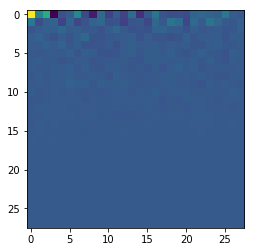

In [9]:
plt.imshow(img)

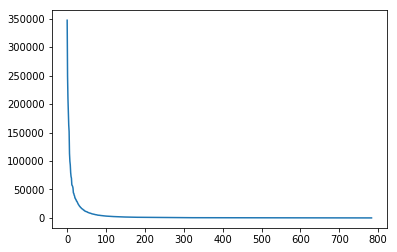

In [10]:
plt.plot(pca.explained_variance_)

In [11]:
np.sum(pca.explained_variance_ > 10000)

53

In [12]:
pca2 = PCA(n_components=2)

In [13]:
X_mod = pca2.fit_transform(X)

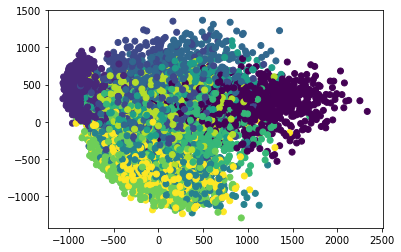

In [14]:
plt.scatter(X_mod[:, 0], X_mod[:, 1], c=y)

In [15]:
X_select = X_mod[y < 3]
y_select = y[y < 3]

In [16]:
colors = ["red", "green", "yellow", "blue"]

In [17]:
y_col = list(map(lambda x: colors[x], y_select))

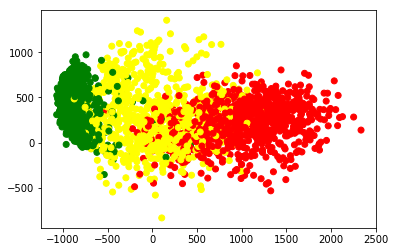

In [18]:
plt.scatter(X_select[:, 0], X_select[:, 1], c=y_col)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier(5)

In [21]:
model.fit(X_select, y_select)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
model.score(X_select, y_select)

0.8971887550200803

In [23]:
X_select.shape

(2490, 2)

In [24]:
X_mod.shape

(8000, 2)

In [25]:
pca3 = PCA(n_components=30)

In [26]:
X_res = pca3.fit_transform(X)

In [27]:
model2 = KNeighborsClassifier(5)

In [28]:
model2.fit(X_res, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
model2.score(X_res, y)

0.973875

In [30]:
X_res.shape

(8000, 30)

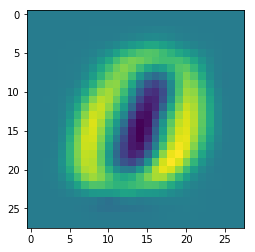

In [42]:
plt.imshow(pca.components_[0].reshape(28, 28))